### 1.数据准备

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

In [13]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes['Outcome']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss_X = StandardScaler()
X = ss_X.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

### 2.default SVC

In [16]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)

In [17]:
#这段报错没懂，请助教指导
from sklearn.metrics import accuracy_score
print("Classification report for classifier %s:\n%s\n"
      % (SVC,metrics.classification_report(y_test, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_predict))

NameError: name 'metrics' is not defined

### 3.GridSearchCV

In [81]:
Cs = np.logspace(-3,3,7)
#penaltys = ['l1','l2']
param_grid = dict(C=Cs)

lsvc = LinearSVC()
lsvc_grid = GridSearchCV(lsvc,param_grid,cv=5)
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
lsvc_grid.cv_results_

D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([0.        , 0.00624971, 0.00624962, 0.04375005, 0.04375014,
        0.04375014, 0.04687514]),
 'std_fit_time': array([0.00000000e+00, 7.65430505e-03, 7.65418839e-03, 6.25002384e-03,
        6.25030996e-03, 6.24971391e-03, 3.23406696e-07]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0.]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0.]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0},
  {'C': 1000.0}],
 'split0_test_score': array([0.75      , 0.79032258, 0.79032258, 0.79032258, 0.79032258,
        0.75806452, 0.75      ]),
 'split1_test_score': array([0.74796748, 0.75609756, 0.76422764, 0.76422764, 0.76422764,
        0.7398374 , 0.72357724]),
 'split2_test_score': array([0.73170732, 0.72357724, 0.72357

In [83]:
test_means = lsvc_grid.cv_results_['mean_test_score']
plt.plot(np.log10(Cs),test_means)
plt.xlabel('log(C)')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

In [89]:
#最佳score和最佳参数
lsvc_grid.best_score_,lsvc_grid.best_params_

(0.760586319218241, {'C': 10.0})

### 4.RBF核SVM正则参数

In [78]:
from sklearn.svm import SVC
C_s = np.logspace(-2,3,6)
gammas = np.logspace(-4,0,5)
param_svc = dict(C=C_s,gamma=gammas)

svc = SVC()
svc_grid = GridSearchCV(svc,param_svc,cv=5)
svc_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
svc_grid.cv_results_

D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Program Files\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([0.01250062, 0.00937457, 0.00937557, 0.00937533, 0.01250043,
        0.01250029, 0.01250024, 0.01249981, 0.00937538, 0.01562495,
        0.0093751 , 0.00937481, 0.00937476, 0.01250033, 0.01562486,
        0.00937467, 0.00937467, 0.0124999 , 0.0156251 , 0.02812524,
        0.00625014, 0.0133193 , 0.01636863, 0.04999938, 0.02187524,
        0.01562457, 0.0218749 , 0.11562519, 0.14839635, 0.01875162]),
 'std_fit_time': array([6.25030995e-03, 7.65430505e-03, 7.65512270e-03, 7.65492801e-03,
        6.25021464e-03, 6.25014305e-03, 6.25011926e-03, 6.24990468e-03,
        7.65496703e-03, 1.78416128e-07, 7.65473340e-03, 7.65449972e-03,
        7.65446079e-03, 6.25016692e-03, 2.11964710e-06, 7.65438291e-03,
        7.65438291e-03, 6.24995242e-03, 4.42200589e-07, 6.24916554e-03,
        7.65483066e-03, 6.84611781e-03, 3.48639621e-03, 6.25007155e-03,
        7.65475287e-03, 8.03580262e-07, 7.65483070e-03, 2.33852758e-02,
        2.88562627e-02, 6.25169286e-03]),
 'mean_scor

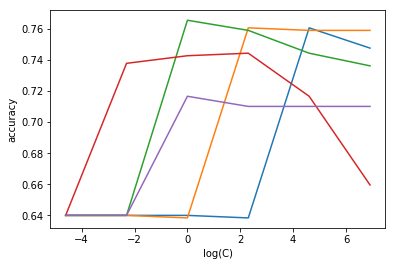

In [84]:
test_scores = svc_grid.cv_results_['mean_test_score'].reshape(len(C_s),len(gammas))
for i,value in enumerate(gammas):
    plt.plot(np.log(C_s),test_scores[:,i])

plt.xlabel('log(C)')
plt.ylabel('accuracy')
plt.show()

In [90]:
#最佳score和最佳参数
svc_grid.best_score_,svc_grid.best_params_

(0.7654723127035831, {'C': 1.0, 'gamma': 0.01})